# Imports
Most of Exploratory Data Analysis / Pre-Processing of this notebook was adapted from https://github.com/AnshulSaini17/Income_evaluation/blob/main/Income_Evalutation.ipynb

In [ ]:
!pip install pyreadr -q
import pandas as pd
import pyreadr
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.7/411.7 kB 12.9 MB/s eta 0:00:00


# Finding Dataset

In [ ]:
# Adapted from https://ofajardo.github.io/pyreadr/_build/html/index.html
path = pyreadr.download_file("https://github.com/dutangc/CASdatasets/raw/refs/heads/master/data/beMTPL97.rda", "/content/beMTPL97.rda")
mtpl97 = pyreadr.read_r(path)
print(mtpl97)

OrderedDict([('beMTPL97',             id      expo claim  nclaims        amount      average coverage  \
0            1  1.000000     1        1   1618.001036  1618.001036      TPL   
1            2  1.000000     0        0      0.000000          NaN     TPL+   
2            3  1.000000     0        0      0.000000          NaN      TPL   
3            4  1.000000     0        0      0.000000          NaN      TPL   
4            5  0.046575     1        1    155.974606   155.974606      TPL   
...        ...       ...   ...      ...           ...          ...      ...   
163207  163208  1.000000     0        0      0.000000          NaN      TPL   
163208  163209  1.000000     0        0      0.000000          NaN      TPL   
163209  163210  1.000000     0        0      0.000000          NaN      TPL   
163210  163211  1.000000     0        0      0.000000          NaN      TPL   
163211  163212  1.000000     1        2  13818.229594  6909.114797    TPL++   

        ageph     sex  bm

In [ ]:
df = pd.DataFrame(mtpl97['beMTPL97'])
df.sample(10)

id      expo claim  nclaims       amount      average coverage  \
25270    25271  1.000000     0        0     0.000000          NaN      TPL   
140306  140307  1.000000     0        0     0.000000          NaN      TPL   
69001    69002  1.000000     0        0     0.000000          NaN     TPL+   
10109    10110  1.000000     0        0     0.000000          NaN    TPL++   
15891    15892  1.000000     1        1  1633.494381  1633.494381      TPL   
141575  141576  0.731507     0        0     0.000000          NaN      TPL   
121898  121899  1.000000     0        0     0.000000          NaN      TPL   
135384  135385  1.000000     0        0     0.000000          NaN     TPL+   
143272  143273  1.000000     0        0     0.000000          NaN      TPL   
34794    34795  1.000000     0        0     0.000000          NaN      TPL   

        ageph     sex  bm  power  agec      fuel      use fleet  postcode  \
25270      68    male   5     64     7  gasoline  private     0      2000   
140306     67    male   0     40     8  gasoline  private     0      8730   
69001      55  female   4     32     8  gasoline  private     0      4430   
10109      66  female   0     44     2  gasoline  private     0      1300   
15891      40    male   1     48    11  gasoline  private     0      1480   
141575     56    male  14     93     9  gasoline  private     0      8800   
121898     34  female   1     65    14    diesel  private     0      7500   
135384     24  female   6     44     1  gasoline  private     0      8490   
143272     40    male   0     40    10    diesel  private     0      8870   
34794      79    male   0    100    14  gasoline  private     0      2590   

            long        lat  
25270   4.387146  51.216042  
140306  3.324737  51.151021  
69001   5.516685  50.658669  
10109   4.584655  50.716109  
15891   4.178547  50.690626  
141575  3.122201  50.937008  
121898  3.375827  50.592519  
135384  3.084695  51.189296  
143272  3.194202  50.922421  
34794   4.643959  51.107829

# Data Cleaning and Exploratory Data Analysis

In [ ]:
df.shape

(163212, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163212 entries, 0 to 163211
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        163212 non-null  int32   
 1   expo      163212 non-null  float64 
 2   claim     163212 non-null  category
 3   nclaims   163212 non-null  int32   
 4   amount    163212 non-null  float64 
 5   average   18276 non-null   float64 
 6   coverage  163212 non-null  category
 7   ageph     163212 non-null  int32   
 8   sex       163212 non-null  category
 9   bm        163212 non-null  int32   
 10  power     163212 non-null  int32   
 11  agec      163212 non-null  int32   
 12  fuel      163212 non-null  category
 13  use       163212 non-null  category
 14  fleet     163212 non-null  category
 15  postcode  163212 non-null  int32   
 16  long      163212 non-null  float64 
 17  lat       163212 non-null  float64 
dtypes: category(6), float64(5), int32(7)
memory usage: 11.5 MB


In [ ]:
df['bm'].value_counts()

bm
0     61647
1     26969
5     11954
2      9522
4      8346
11     8304
10     6625
9      6241
6      5278
7      5266
8      4523
3      3947
12     1251
14     1084
13     1003
15      584
16      177
17      150
18      124
19       98
20       61
22       31
21       27
Name: count, dtype: int64

In [ ]:
df.columns

Index(['id', 'expo', 'claim', 'nclaims', 'amount', 'average', 'coverage',
       'ageph', 'sex', 'bm', 'power', 'agec', 'fuel', 'use', 'fleet',
       'postcode', 'long', 'lat'],
      dtype='object')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
min_expo = min(df['expo'])
max_expo = max(df['expo'])
print(f"Exposure range: [{min_expo:.4f}, {max_expo}]")

Exposure range: [0.0027, 1.0]


In [ ]:
# Check for null values
df.isnull().sum()

id               0
expo             0
claim            0
nclaims          0
amount           0
average     144936
coverage         0
ageph            0
sex              0
bm               0
power            0
agec             0
fuel             0
use              0
fleet            0
postcode         0
long             0
lat              0
dtype: int64

It looks like there are null values in the average column but this may just be because the amount is 0. Lets do some futher analysis

In [ ]:
avg_null = df[['average', 'amount']]
avg_null = avg_null[avg_null['average'].isnull() & avg_null['amount'] != 0].sum()
avg_null.head()

average    0.0
amount     0.0
dtype: float64

Ok, so we can see there are no cases where the average is null and the amount isn't zero, so we can just set the average to zero in these cases

In [ ]:
df['average'] = df['average'].fillna(0)
# Check again for null values
df.isnull().sum()

id          0
expo        0
claim       0
nclaims     0
amount      0
average     0
coverage    0
ageph       0
sex         0
bm          0
power       0
agec        0
fuel        0
use         0
fleet       0
postcode    0
long        0
lat         0
dtype: int64

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='category']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 6 categorical variables

The categorical variables are :

 ['claim', 'coverage', 'sex', 'fuel', 'use', 'fleet']


In [ ]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int32' or df[var_1].dtype=='float64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 12 numerical variables

The numerical variables are :

 ['id', 'expo', 'nclaims', 'amount', 'average', 'ageph', 'bm', 'power', 'agec', 'postcode', 'long', 'lat']


## Outliers

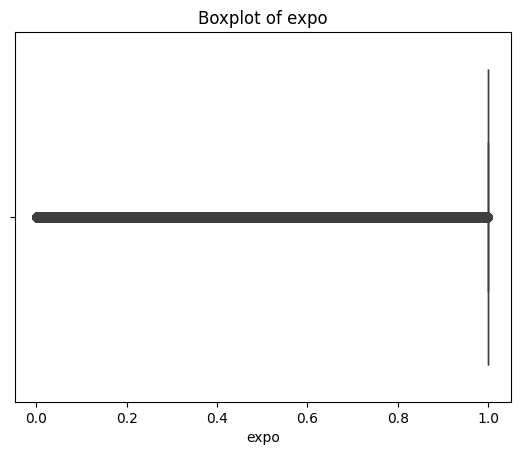

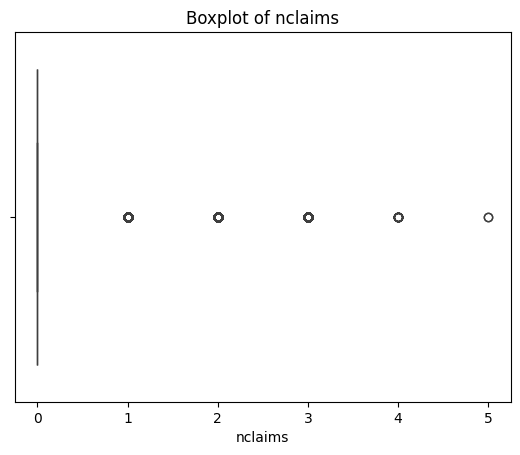

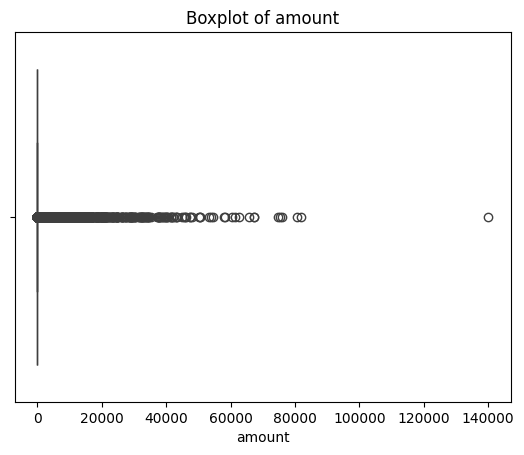

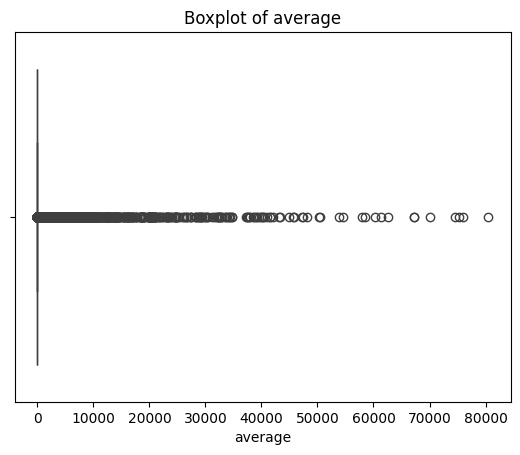

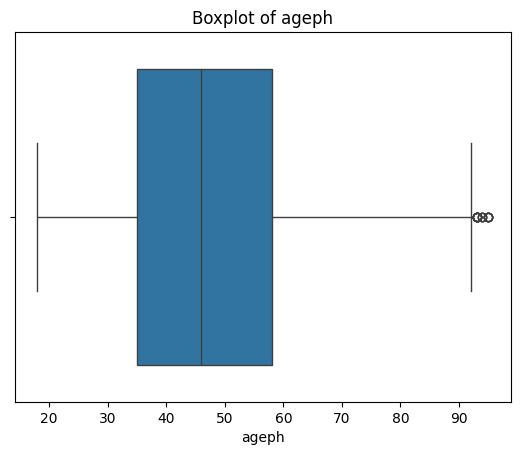

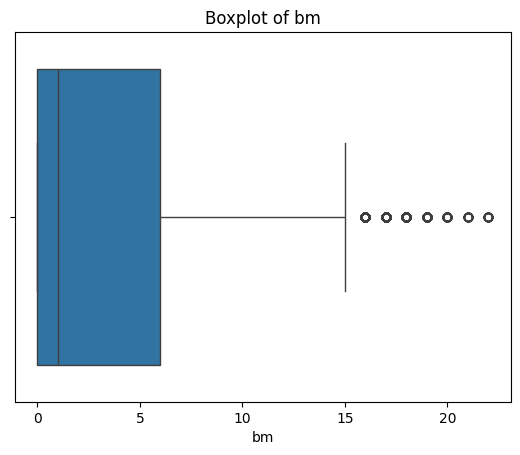

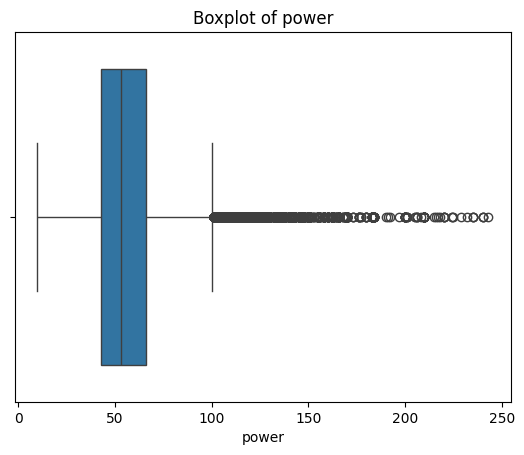

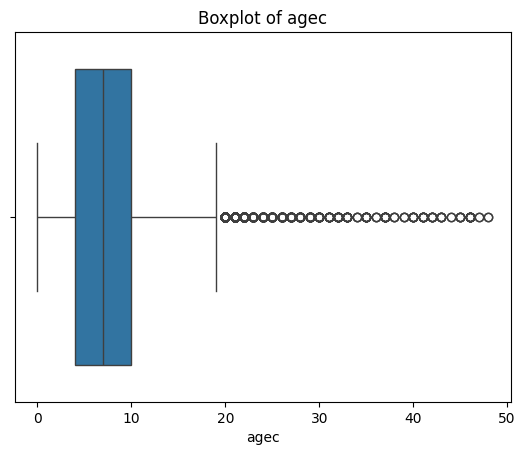

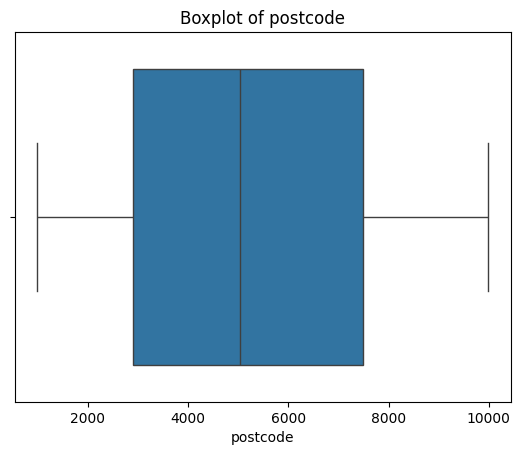

In [ ]:
for i in numerical:
  if i not in ['id','coverage','long','lat']:
    sns.boxplot(x=df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()

Observations:
- nclaims, ageph(policy holder age), bm, agec(vehicle's age) look like ordinal variables, as the outlier positions have very strict spacing.
- For nclaims and bm, they seem to be integers between [0,5] and [0,22] respectively. In this relatively small space size, be cautious with regression models.
- Refer to this source for the bonus-malus system of responsible driving, a.k.a. the "bm" column's values; note that the dataset's situation has no negative scores. From the dataset discription, lower score = better claim history. From the boxplot, 75% of the data resides in around a score of 0-6, which denotes decent claim history - this is consistent with the nclaims, amount & average data, which are mostly 0, indicating no claim being made by those safe drivers.
  
  https://www.lalux.lu/en/blog/the-bonus-malus-system-towards-more-responsible-driving
- The variable exposure is mostly 1 - from the dataset's description, this would mean that at least 75% of the drivers would be driving all year around, thus 100% of their year was "exposed" to potential risk.
- It looks like there is one extreme outlier in amount, we will also remove that.

In [ ]:
# Double check our observations
for col in ['nclaims', 'ageph', 'bm', 'agec']:
  print(df[col].value_counts().head(10), "\n")
# Remove outlier
outlier_amt = df.loc[df['amount']>120000,'amount'].index
df.drop(index=outlier_amt,inplace=True)
print(df['amount'].describe())


nclaims
0    144936
1     16539
2      1556
3       162
4        17
5         2
Name: count, dtype: int64 

ageph
43    4002
49    3994
47    3944
50    3923
51    3906
45    3899
39    3891
38    3882
42    3882
41    3874
Name: count, dtype: int64 

bm
0     61647
1     26969
5     11954
2      9522
4      8346
11     8304
10     6625
9      6241
6      5278
7      5266
Name: count, dtype: int64 

agec
6     15053
8     13988
7     13886
2     13726
4     12773
3     12517
9     12485
5     12432
10    11549
11    10058
Name: count, dtype: int64 

count    163211.000000
mean        161.293893
std        1330.263575
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       81946.162484
Name: amount, dtype: float64


## Data Visualization

In [ ]:
df['coverage_re'] = df['coverage'].map({'TPL': 1, 'TPL+': 2, 'TPL++': 3})
df.drop(columns=['id','coverage','long','lat'], inplace=True)
df

expo claim  nclaims        amount      average  ageph     sex  bm  \
0       1.000000     1        1   1618.001036  1618.001036     50    male   5   
1       1.000000     0        0      0.000000     0.000000     64  female   5   
2       1.000000     0        0      0.000000     0.000000     60    male   0   
3       1.000000     0        0      0.000000     0.000000     77    male   0   
4       0.046575     1        1    155.974606   155.974606     28  female   9   
...          ...   ...      ...           ...          ...    ...     ...  ..   
163207  1.000000     0        0      0.000000     0.000000     37    male   5   
163208  1.000000     0        0      0.000000     0.000000     44    male   0   
163209  1.000000     0        0      0.000000     0.000000     50    male   0   
163210  1.000000     0        0      0.000000     0.000000     43    male   0   
163211  1.000000     1        2  13818.229594  6909.114797     24    male   6   

        power  agec      fuel      use fleet  postcode coverage_re  
0          77    12  gasoline  private     0      1000           1  
1          66     3  gasoline  private     0      1000           2  
2          70    10    diesel  private     0      1000           1  
3          57    15  gasoline  private     0      1000           1  
4          70     7  gasoline  private     0      1000           1  
...       ...   ...       ...      ...   ...       ...         ...  
163207     40    10    diesel     work     0      9990           1  
163208     55     6    diesel  private     0      9990           1  
163209     40    10    diesel  private     0      9990           1  
163210     66     7  gasoline  private     0      9990           1  
163211     47     2  gasoline  private     0      9990           3  

[163211 rows x 15 columns]

In [ ]:
corr = df[['expo','claim','nclaims','amount','average','bm', 'coverage_re', 'postcode']].corr()
corr

expo     claim   nclaims    amount   average        bm  \
expo         1.000000  0.055657  0.052267  0.005758  0.005763 -0.104115   
claim        0.055657  1.000000  0.949188  0.341461  0.335502  0.096543   
nclaims      0.052267  0.949188  1.000000  0.359407  0.318049  0.103242   
amount       0.005758  0.341461  0.359407  1.000000  0.972284  0.044590   
average      0.005763  0.335502  0.318049  0.972284  1.000000  0.040028   
bm          -0.104115  0.096543  0.103242  0.044590  0.040028  1.000000   
coverage_re  0.034899 -0.008556 -0.011535 -0.002543 -0.001150 -0.094263   
postcode     0.071068 -0.017205 -0.017996 -0.002771 -0.003069 -0.026027   

             coverage_re  postcode  
expo            0.034899  0.071068  
claim          -0.008556 -0.017205  
nclaims        -0.011535 -0.017996  
amount         -0.002543 -0.002771  
average        -0.001150 -0.003069  
bm             -0.094263 -0.026027  
coverage_re     1.000000 -0.150797  
postcode       -0.150797  1.000000

In [ ]:
numerical = numerical[1:-2]
print(numerical)

['expo', 'nclaims', 'amount', 'average', 'ageph', 'bm', 'power', 'agec', 'postcode']


<ipython-input-20-6951f0f38bc0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


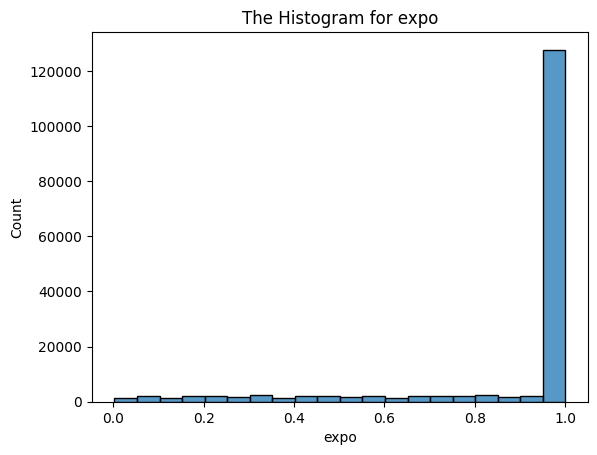

<ipython-input-20-6951f0f38bc0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


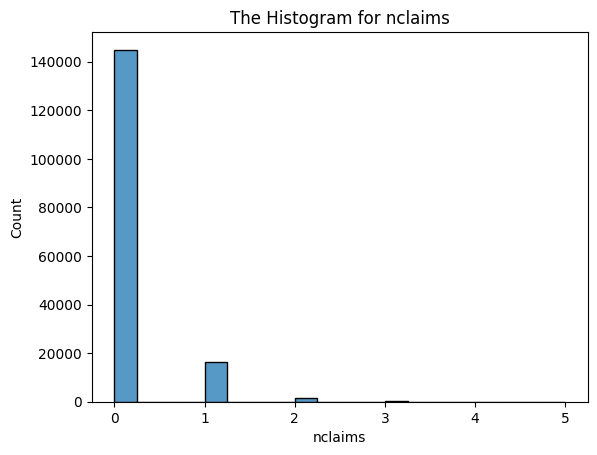

<ipython-input-20-6951f0f38bc0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


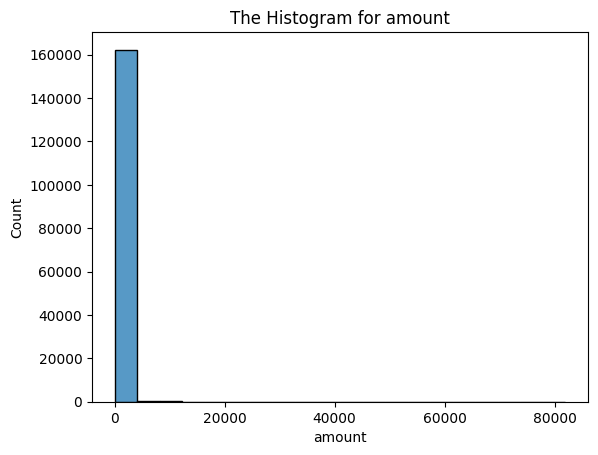

<ipython-input-20-6951f0f38bc0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


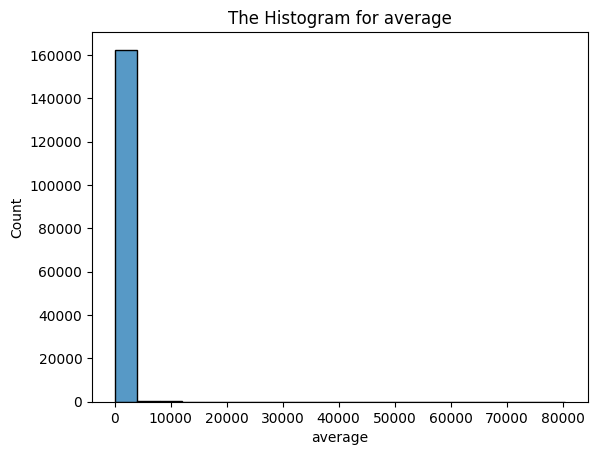

<ipython-input-20-6951f0f38bc0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


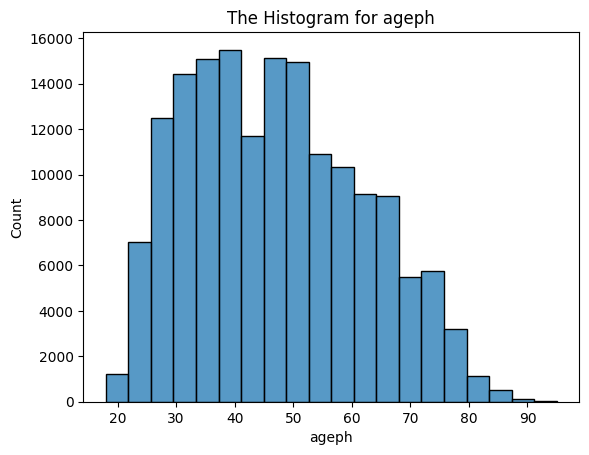

<ipython-input-20-6951f0f38bc0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


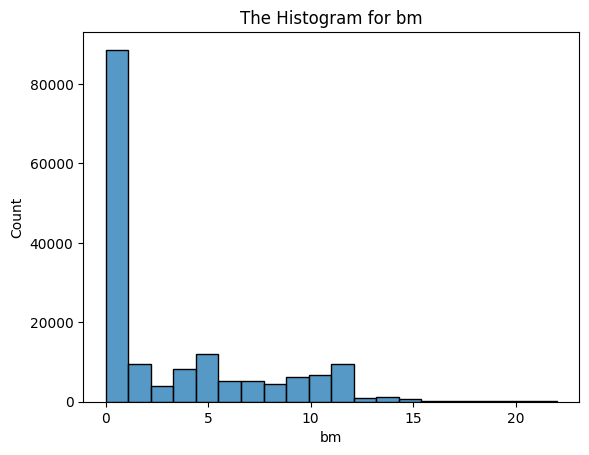

<ipython-input-20-6951f0f38bc0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


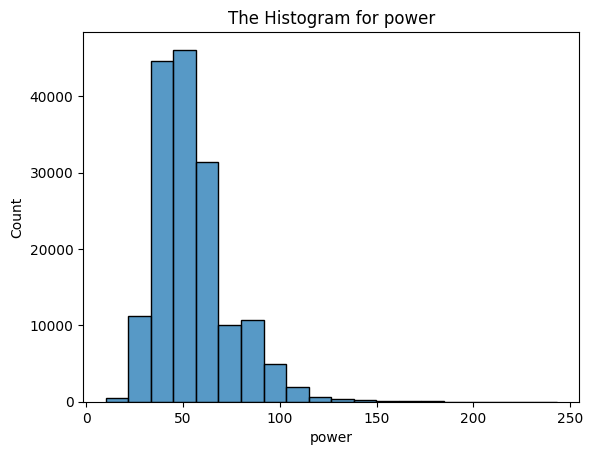

<ipython-input-20-6951f0f38bc0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


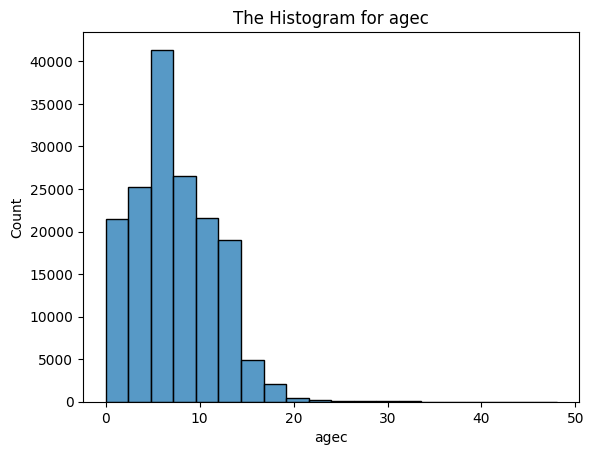

<ipython-input-20-6951f0f38bc0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


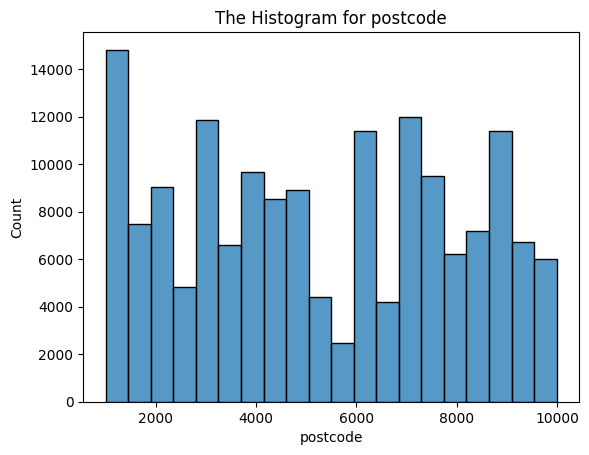

In [ ]:
for i in numerical:
    sns.histplot(x=df[i], palette='Set1',bins=20)
    plt.title("The Histogram for {}".format(i))
    plt.show()

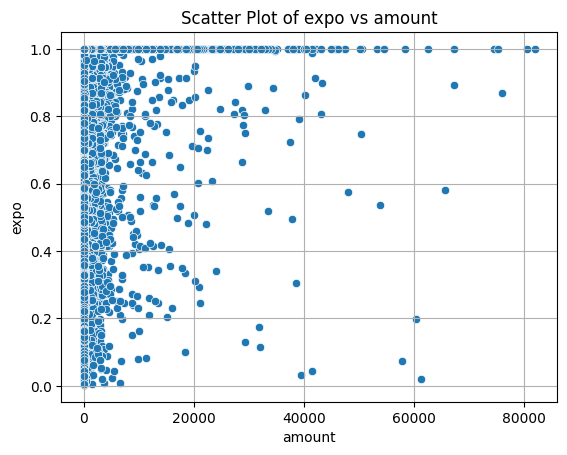

In [ ]:
# dive into correlation between amount and expo
sns.scatterplot(x='amount', y='expo', data=df)
plt.title('Scatter Plot of expo vs amount')
plt.grid(True)
plt.show()

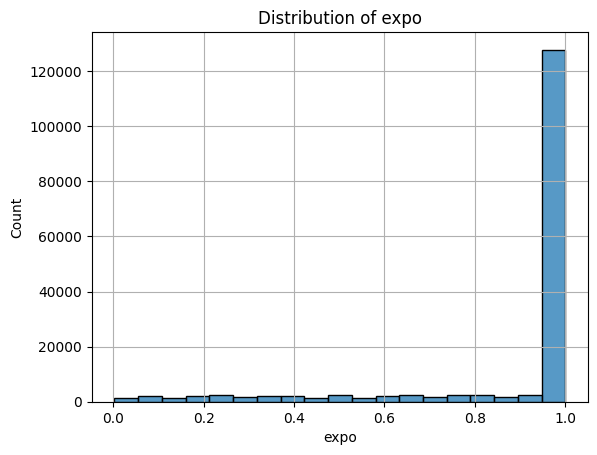

In [ ]:
sns.histplot(x='expo', data=df)
plt.title('Distribution of expo')
plt.grid(True)
plt.show()

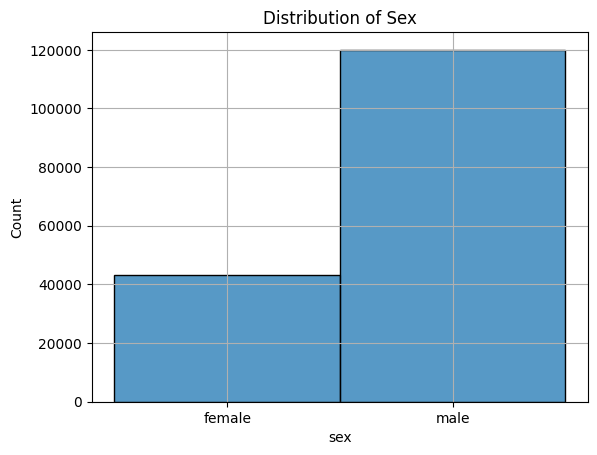

In [ ]:
sns.histplot(x='sex', data=df)
plt.title('Distribution of Sex')
plt.grid(True)
plt.show()

We can see there are more male drivers than female drivers

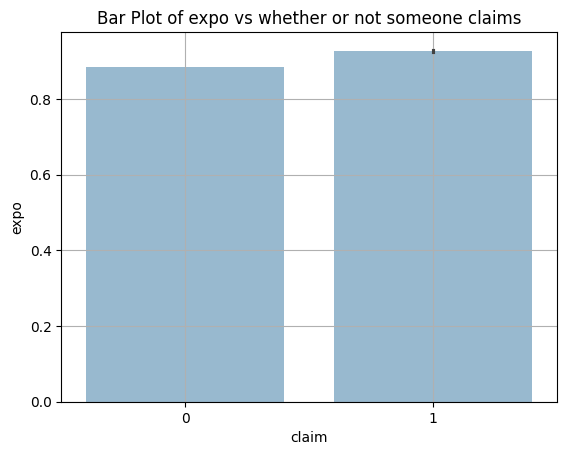

In [ ]:
sns.barplot(x='claim', y='expo', data=df, alpha=0.5)
plt.title('Bar Plot of expo vs whether or not someone claims')
plt.grid(True)
plt.show()

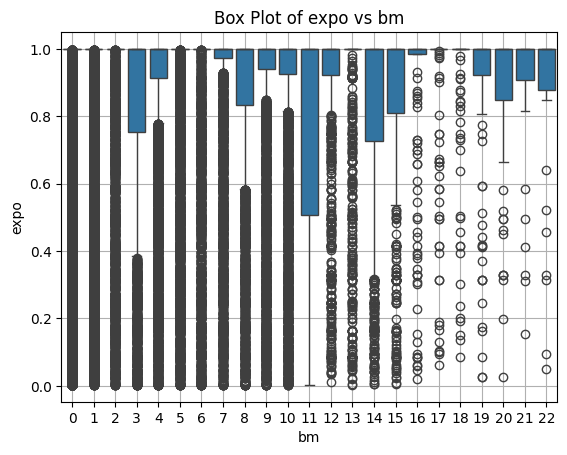

In [ ]:
sns.boxplot(x='bm', y='expo', data=df)
plt.title('Box Plot of expo vs bm')
plt.grid(True)
plt.show()

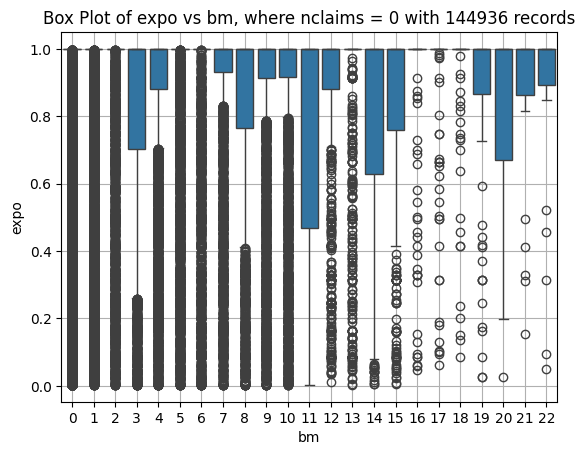

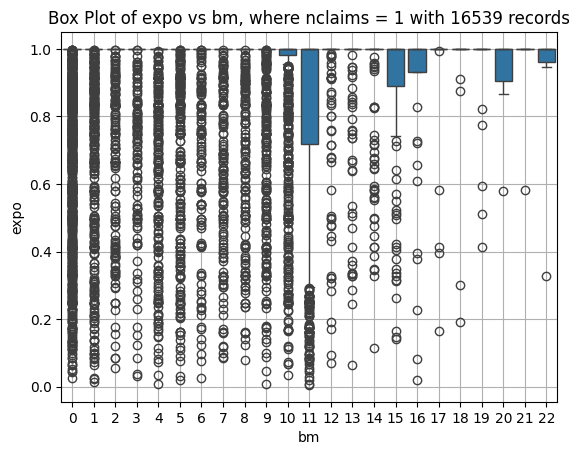

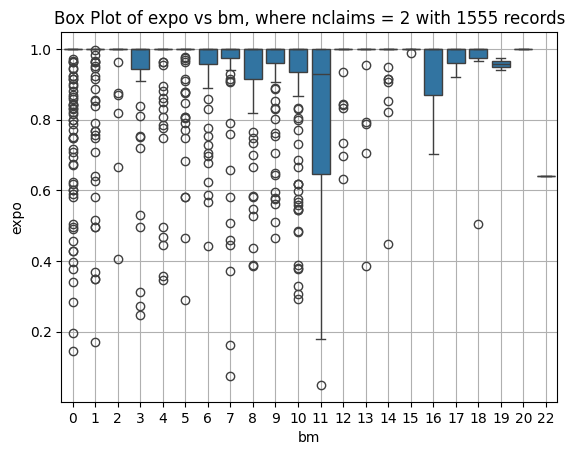

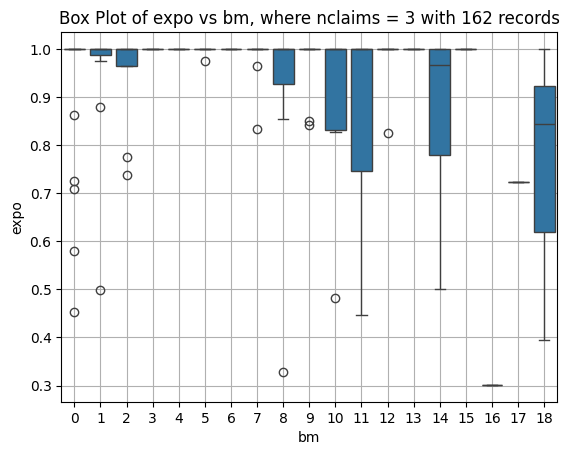

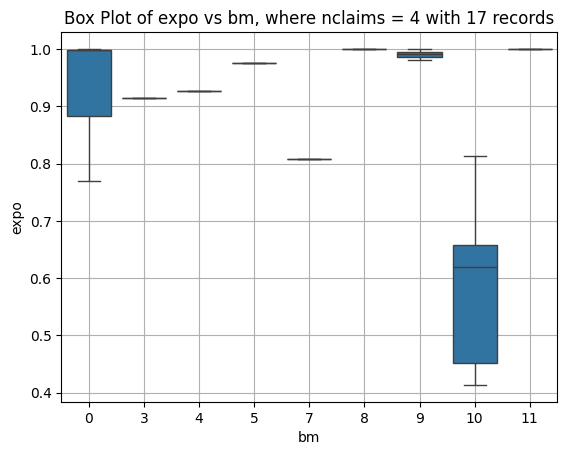

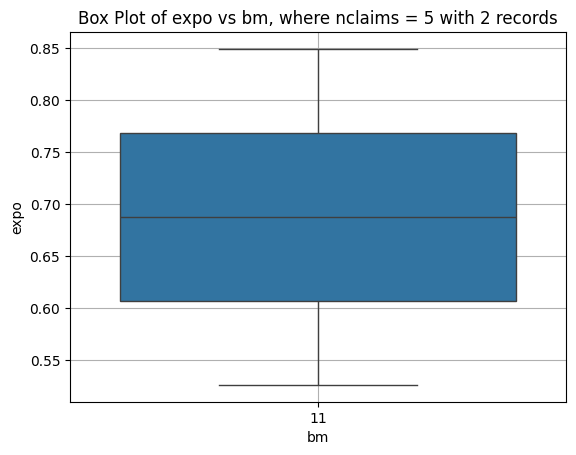

In [ ]:
for num_clm in range(0, 6):
  df_flt = df[df['nclaims'] == num_clm]
  ct = df_flt['expo'].count()
  sns.boxplot(x='bm', y='expo', data=df_flt)
  plt.title(f'Box Plot of expo vs bm, where nclaims = {num_clm} with {ct} records')
  plt.grid(True)
  plt.show()

We can see that vast majority of data has exposure very near 1.0; even for users with more claims, this distribution is not significantly different. Maybe exposure is not a reliable source to predict nclaims.

Furthermore, note that nclaims=4 has only 17 records and nclaims=5 has only 2 records, these data might not accurately reflect the true distribution.

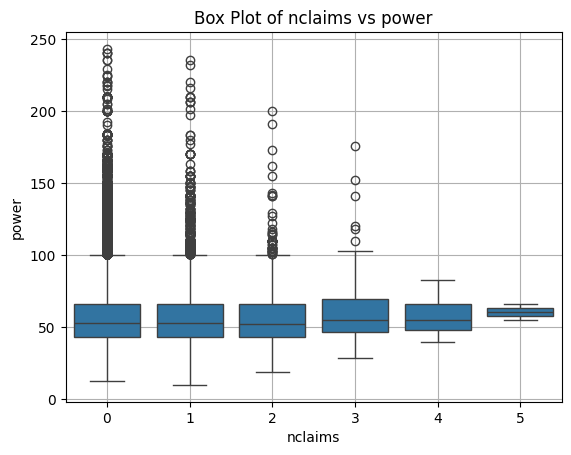

In [ ]:
sns.boxplot(x='nclaims', y='power', data=df)
plt.title('Box Plot of nclaims vs power')
plt.grid(True)
plt.show()

It does not seem that power have very close association with the nclaims. Recall 4 and 5 have significantly less data associated so the boxes there are less convincing.

In [ ]:
df_grp = df.groupby(["nclaims", "sex"])["ageph"].median().reset_index()
print(df_grp)
fig = px.scatter(df_grp, x="nclaims", y="ageph", color="sex",
                 title="Nclaims vs median Ageph by Sex",
                 labels={"ageph": "median of Ageph", "nclaims": "Number of Claims", "sex": "Sex"})
fig.show()

fig2 = px.box(df, x="nclaims", y="ageph", color="sex",
                 title="Nclaims vs Ageph by Sex",
                 labels={"ageph": "Ageph", "nclaims": "Number of Claims", "sex": "Sex"})
fig2.show()

<ipython-input-28-268d5cd680a8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grp = df.groupby(["nclaims", "sex"])["ageph"].median().reset_index()


    nclaims     sex  ageph
0         0  female   42.0
1         0    male   48.0
2         1  female   40.0
3         1    male   44.0
4         2  female   40.0
5         2    male   40.0
6         3  female   43.0
7         3    male   37.0
8         4  female   30.0
9         4    male   27.5
10        5  female   46.0
11        5    male   25.0


The general trend observed: as number of claims increases, the median age would slightly decrease. This would make sense, as younger population would be less experienced and more likely to be impulsive.

In [ ]:
df_grp = df.groupby(["nclaims"])["agec"].median().reset_index()
print(df_grp)
fig = px.scatter(df_grp, x="nclaims", y="agec",
                 title="Nclaims vs median vehicle age",
                 labels={"agec": "median of vehicle age", "nclaims": "Number of Claims"})
fig.show()

fig2 = px.box(df, x="nclaims", y="agec",
                 title="Nclaims vs vehicle age",
                 labels={"agec": "vehicle age", "nclaims": "Number of Claims"})
fig2.show()

   nclaims  agec
0        0   7.0
1        1   7.0
2        2   7.0
3        3   8.0
4        4   9.0
5        5   7.5


There is also a slight positive correlation between nclaims and vehicle age.
(for nclaims, do not heavily consider data point for 4 and especially not 5, as they have very limited data points)

In [ ]:
df_grp = df.groupby(["nclaims"])["bm"].median().reset_index()
print(df_grp)
fig = px.scatter(df_grp, x="nclaims", y="bm",
                 title="Nclaims vs median bm",
                 labels={"bm": "median bm", "nclaims": "Number of Claims"})
fig.show()

fig2 = px.box(df, x="nclaims", y="bm",
                 title="Nclaims vs bm",
                 labels={"bm": "bm", "nclaims": "Number of Claims"})
fig2.show()

   nclaims    bm
0        0   1.0
1        1   2.0
2        2   5.0
3        3   7.0
4        4   9.0
5        5  11.0


For higher number of claims, we can in general expect the median bm to be higher, i.e. the user is rated as a more reckless driver from past experience.

In [ ]:
df_fuel = df["fuel"].value_counts()
df_plt = df.groupby(["nclaims", "fuel"])["amount"].count().reset_index()
df_plt["amount"] = df_plt.apply(lambda row: (row["amount"] / df_fuel[row["fuel"]]), axis=1)
print(df_fuel)
print(df_plt)
fig = px.bar(df_plt, x="nclaims", y="amount", color="fuel",
                 title="Incidence frequencies with Fuel type and Nclaims",
                 labels={"fuel": "Fuel type", "nclaims": "Number of Claims"})
fig.show()

df_use = df["use"].value_counts()
df_plt = df.groupby(["nclaims", "use"])["amount"].count().reset_index()
df_plt["amount"] = df_plt.apply(lambda row: (row["amount"] / df_use[row["use"]]), axis=1)
print(df_use)
print(df_plt)
fig = px.bar(df_plt, x="nclaims", y="amount", color="use",
                 title="Incidence frequencies with Use case and Nclaims",
                 labels={"use": "Use case", "nclaims": "Number of Claims"})
fig.show()

<ipython-input-31-a91fe706b6d2>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



fuel
gasoline    112817
diesel       50394
Name: count, dtype: int64
    nclaims      fuel    amount
0         0    diesel  0.874033
1         0  gasoline  0.894280
2         1    diesel  0.113863
3         1  gasoline  0.095739
4         2    diesel  0.010874
5         2  gasoline  0.008926
6         3    diesel  0.001091
7         3  gasoline  0.000948
8         4    diesel  0.000139
9         4  gasoline  0.000089
10        5    diesel  0.000000
11        5  gasoline  0.000018


use
private    155333
work         7878
Name: count, dtype: int64
    nclaims      use    amount
0         0  private  0.888015
1         0     work  0.888297
2         1  private  0.101421
3         1     work  0.099645
4         2  private  0.009425
5         2     work  0.011551
6         3  private  0.001017
7         3     work  0.000508
8         4  private  0.000109
9         4     work  0.000000
10        5  private  0.000013
11        5     work  0.000000


<ipython-input-31-a91fe706b6d2>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



It does not appear that either fuel type or use case (public vs private) is correlated to claims' frequency.

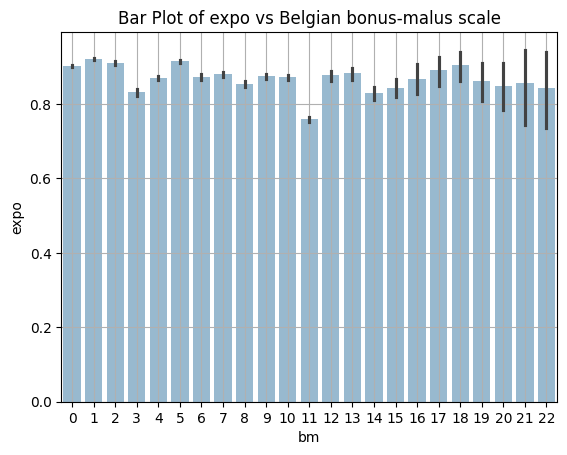

In [ ]:
sns.barplot(x='bm', y='expo', data=df, alpha=0.5)
plt.title('Bar Plot of expo vs Belgian bonus-malus scale')
plt.grid(True)
plt.show()

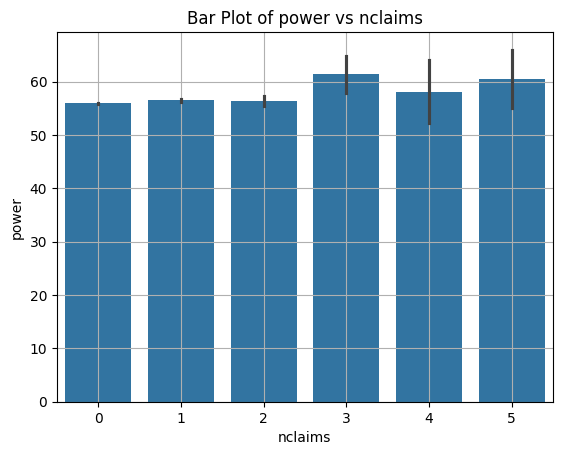

In [ ]:
sns.barplot(x='nclaims', y='power', data=df)
plt.title('Bar Plot of power vs nclaims')
plt.grid(True)
plt.show()

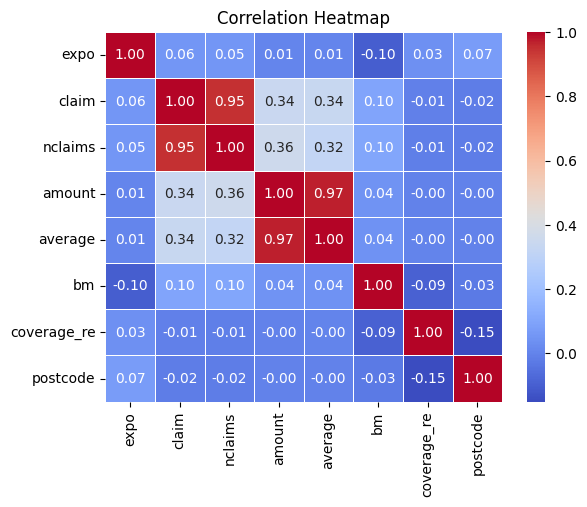

In [ ]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

We can see there is very high correlation between claim and nclaims so we will have to drop claim in order to simulate real world scenario. (If an insurance company was trying to predict the number of claims a potential policy holder would make, they probably wouldnt know whether or not the policy hodler was going to make a claim). We also see that amount and average are very highly correlated, so to use them as an input to our model, we will have to drop the other.

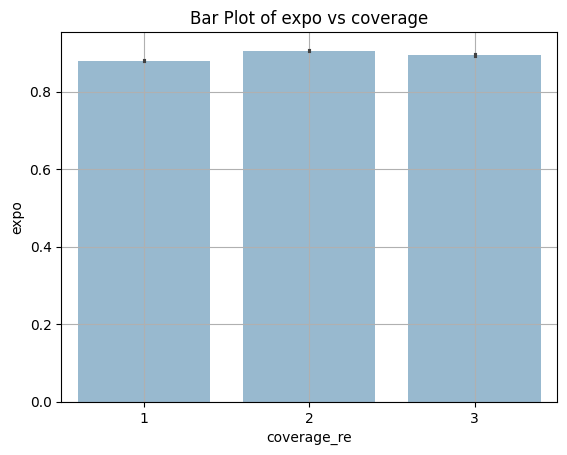

In [ ]:
sns.barplot(x='coverage_re', y='expo', data=df, alpha=0.5)
plt.title('Bar Plot of expo vs coverage')
plt.grid(True)
plt.show()

View the distrabution of exposure and create a new column of low, med, high for easier visualization.

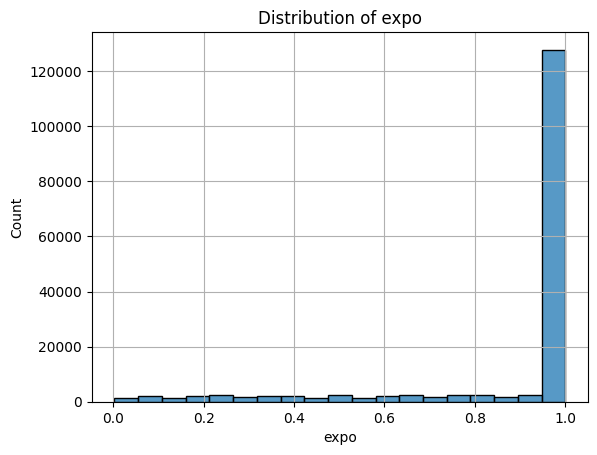

In [ ]:
sns.histplot(x='expo', data=df)
plt.title('Distribution of expo')
plt.grid(True)
plt.show()

In [ ]:
# Break into .0-.4, .4-.8, .8-1.0
# Adapted from https://stackoverflow.com/questions/72081905/how-do-i-group-numerical-data-into-groups-from-a-dataframe-to-make-a-bar-chart-w
groups = [[0, 0.4], [0.4, 0.8], [0.8, 1]]
df['expo_groups'] = df['expo'].map(lambda x: 1 if x <= 0.4 else 2 if x <= .8 else 3)
df.head()

expo claim  nclaims       amount      average  ageph     sex  bm  \
0  1.000000     1        1  1618.001036  1618.001036     50    male   5   
1  1.000000     0        0     0.000000     0.000000     64  female   5   
2  1.000000     0        0     0.000000     0.000000     60    male   0   
3  1.000000     0        0     0.000000     0.000000     77    male   0   
4  0.046575     1        1   155.974606   155.974606     28  female   9   

   power  agec      fuel      use fleet  postcode coverage_re  expo_groups  
0     77    12  gasoline  private     0      1000           1            3  
1     66     3  gasoline  private     0      1000           2            3  
2     70    10    diesel  private     0      1000           1            3  
3     57    15  gasoline  private     0      1000           1            3  
4     70     7  gasoline  private     0      1000           1            1

In [ ]:
# Takes way too long to run
# sns.pairplot(data=df[['expo_groups','amount','nclaims','bm','ageph','sex']], hue="expo_groups", kind="kde")
# plt.title('Distributions for each variable')
# plt.show()

# Problem Formulation


We want to predict the probability distribution for the number of claims (from 0 to 4), given the subject's age, the vehicle's age and the subject's bm score.

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [ ]:
le_dictionary = {}
def label_encoder(col_name:str):
  le = LabelEncoder()
  df[col_name] = le.fit_transform(df[col_name])

  # Adapted from https://stackoverflow.com/questions/42196589/any-way-to-get-mappings-of-a-label-encoder-in-python-pandas
  le_dictionary[col_name] = dict(zip(le.classes_, le.transform(le.classes_)))

categorical

['claim', 'coverage', 'sex', 'fuel', 'use', 'fleet']

In [ ]:
label_list = ['sex', 'fuel', 'use']

In [ ]:
for i in label_list:
  label_encoder(i)

df.head()

expo claim  nclaims       amount      average  ageph  sex  bm  power  \
0  1.000000     1        1  1618.001036  1618.001036     50    1   5     77   
1  1.000000     0        0     0.000000     0.000000     64    0   5     66   
2  1.000000     0        0     0.000000     0.000000     60    1   0     70   
3  1.000000     0        0     0.000000     0.000000     77    1   0     57   
4  0.046575     1        1   155.974606   155.974606     28    0   9     70   

   agec  fuel  use fleet  postcode coverage_re  expo_groups  
0    12     1    0     0      1000           1            3  
1     3     1    0     0      1000           2            3  
2    10     0    0     0      1000           1            3  
3    15     1    0     0      1000           1            3  
4     7     1    0     0      1000           1            1

In [ ]:
le_dictionary

{'sex': {'female': np.int64(0), 'male': np.int64(1)},
 'fuel': {'diesel': np.int64(0), 'gasoline': np.int64(1)},
 'use': {'private': np.int64(0), 'work': np.int64(1)}}

This dictionary shows how the labels were mapped

# Normalizing / Standardizing the variables

After looking back at the visualizations, none of the columns looked very close to normal, so we will be using Normailzation

In [ ]:
scaler = MinMaxScaler()
df.head()

expo claim  nclaims       amount      average  ageph  sex  bm  power  \
0  1.000000     1        1  1618.001036  1618.001036     50    1   5     77   
1  1.000000     0        0     0.000000     0.000000     64    0   5     66   
2  1.000000     0        0     0.000000     0.000000     60    1   0     70   
3  1.000000     0        0     0.000000     0.000000     77    1   0     57   
4  0.046575     1        1   155.974606   155.974606     28    0   9     70   

   agec  fuel  use fleet  postcode coverage_re  expo_groups  
0    12     1    0     0      1000           1            3  
1     3     1    0     0      1000           2            3  
2    10     0    0     0      1000           1            3  
3    15     1    0     0      1000           1            3  
4     7     1    0     0      1000           1            1

In [ ]:
feature_cols = ['ageph','agec','bm','power']
# scale_map_dict = {}
# for i in feature_cols:
#   scale_map_dict[i] = {'min': df[i].min(), 'max': df[i].max()}

# scaler.fit(df[feature_cols])
# scaled_features = scaler.transform(df[feature_cols])

# df_scaled = pd.DataFrame(scaled_features, columns=feature_cols)
# df_scaled.head()


df_scaled = df[feature_cols]

In [ ]:
df_scaled = pd.merge(df[['expo', 'claim', 'nclaims','sex','fuel','use','fleet','coverage_re','expo_groups']], df_scaled, left_index=True, right_index=True)
df_scaled.head()

expo claim  nclaims  sex  fuel  use fleet coverage_re  expo_groups  \
0  1.000000     1        1    1     1    0     0           1            3   
1  1.000000     0        0    0     1    0     0           2            3   
2  1.000000     0        0    1     0    0     0           1            3   
3  1.000000     0        0    1     1    0     0           1            3   
4  0.046575     1        1    0     1    0     0           1            1   

   ageph  agec  bm  power  
0     50    12   5     77  
1     64     3   5     66  
2     60    10   0     70  
3     77    15   0     57  
4     28     7   9     70

# Handling Imbalanced Data
We are tring to predict nclaims with bm, ageph and agec; so lets see if the feature variables are balanced

In [ ]:
for col in ['bm', 'ageph', 'agec', 'sex', 'power']:
  print(df_scaled[col].value_counts().head(10))
  px.histogram(df_scaled[col], title=f'Distribution of {col}').show()

bm
0     61647
1     26968
5     11954
2      9522
4      8346
11     8304
10     6625
9      6241
6      5278
7      5266
Name: count, dtype: int64


ageph
43    4002
49    3994
47    3944
50    3923
51    3906
45    3899
39    3891
38    3882
42    3882
41    3874
Name: count, dtype: int64


agec
6     15053
8     13988
7     13886
2     13726
4     12773
3     12517
9     12484
5     12432
10    11549
11    10058
Name: count, dtype: int64


sex
1    120043
0     43168
Name: count, dtype: int64


power
55    17079
40    15373
66    11880
44     9298
33     7210
43     7013
47     5786
51     5650
65     4553
60     4217
Name: count, dtype: int64


In [ ]:
col = 'nclaims'
print(df_scaled[col].value_counts().head(10))
px.histogram(df_scaled[col], title=f'Distribution of {col}').show()

nclaims
0    144936
1     16539
2      1555
3       162
4        17
5         2
Name: count, dtype: int64


Based on the results we will have to oversample some of the minority bm and sex as they are heavily skewed.

Other "x" variables are roughly normal hence can be ignored.

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# drop this extremely rare scenario
df_scaled = df_scaled[df_scaled['nclaims'] < 5]

# Define predictor and outocme variables
X, y = df_scaled[ ['bm', 'ageph', 'agec', 'sex', 'power'] ], df_scaled['nclaims']

# Oversample 3, and 4 first (since we are using smote)
smk = SMOTE(sampling_strategy={3: 1500, 4: 1500}, random_state=42)
X, y = smk.fit_resample(X, y)

# Undersample 0, 1, and 2
undersample = RandomUnderSampler(sampling_strategy={0: 1500, 1: 1500, 2: 1500}, random_state=42)
X, y = undersample.fit_resample(X, y)

# oversample = RandomOverSampler(sampling_strategy={3: 1500, 4: 1500}, random_state=42)
# X, y = oversample.fit_resample(X, y)

In [ ]:
# Make sure the resampling is successful
print("x\n", X.columns)
print("bm before\n", df_scaled['bm'].value_counts())
print("bm after\n", X['bm'].value_counts())
print("sex before\n", df_scaled['sex'].value_counts())
print("sex after\n", X['sex'].value_counts())
print("y\n", y.value_counts())
print(X.shape, y.shape)

x
 Index(['bm', 'ageph', 'agec', 'sex', 'power'], dtype='object')
bm before
 bm
0     61647
1     26968
5     11954
2      9522
4      8346
11     8302
10     6625
9      6241
6      5278
7      5266
8      4523
3      3947
12     1251
14     1084
13     1003
15      584
16      177
17      150
18      124
19       98
20       61
22       31
21       27
Name: count, dtype: int64
bm after
 bm
0     1621
1      810
9      624
10     601
11     569
5      549
8      505
7      459
6      371
4      366
2      350
3      311
13      98
12      94
14      76
15      33
16      18
18      17
17      17
19       4
20       3
21       2
22       2
Name: count, dtype: int64
sex before
 sex
1    120042
0     43167
Name: count, dtype: int64
sex after
 sex
1    4714
0    2786
Name: count, dtype: int64
y
 nclaims
0    1500
1    1500
2    1500
3    1500
4    1500
Name: count, dtype: int64
(7500, 5) (7500,)


It can successfully upsampled nclaims 1-4, but it's not really doable for nclaims=5, as there are only 2 records. Thus we simply drop this case, as this is extremely rare whatsoever, and keeping this may negatively impact the model's stability.

Recall that previously, we identified bm, agec and ageph as factors to predict nclaims; let's omit sex for now, and see if this variable is explained away by other factors.

# Train / Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 97)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6000, 5)
(1500, 5)
(6000,)
(1500,)


# Modeling

In [ ]:
def calc_mse(preds, actual):
  diff = preds - actual
  diff_sqr = diff.apply(lambda x: x*x)
  return diff_sqr.mean()
def calc_pred_mse(model, features, actual):
  preds = model.predict(features)
  return calc_mse(preds, actual)

In [ ]:
# "Baseline" model: a model should at least out-perform this one that always predicts 0
from sklearn.linear_model import LinearRegression
population_mean = y_train.mean()
print("Mean", population_mean)
const_y = y_train.copy()
const_y.iloc[:] = population_mean
print(const_y.describe())
model_baseline = LinearRegression().fit(X_train, const_y)
print(X_train.columns)
print("Baseline score", model_baseline.score(X_test, y_test))
print("Baseline mse", calc_pred_mse(model_baseline, X_test, y_test))
print(model_baseline.coef_, model_baseline.intercept_)

Mean 2.0051666666666668
count    6.000000e+03
mean     2.005167e+00
std      1.780946e-13
min      2.005167e+00
25%      2.005167e+00
50%      2.005167e+00
75%      2.005167e+00
max      2.005167e+00
Name: nclaims, dtype: float64
Index(['bm', 'ageph', 'agec', 'sex', 'power'], dtype='object')
Baseline score -0.00033655707144997216
Baseline mse 1.9835735833333334
[-1.54487900e-32 -5.89991786e-33  1.66859997e-33 -2.86799715e-32
 -3.00617509e-33] 2.005166666666667


<ipython-input-54-dabc53980f18>:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0051666666666668' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



We want the weights of the model to encorporate the ordinal nature of nclaims.
Thus, although the nclaim data can be seen as ordinal categorical, we want to interpret it as discrete numeric and use a regression model for efficient utilization of data & weights.

In [ ]:
# First model to consider: multiple linear regression
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(X_train, y_train)
print(X_train.columns)
# RMSE would be the appropriate estimate for model accuracy
# The desired prediction is the mean of nclaims' conditional distribution with respect to feature variables.
print("Multiple linear 1 score", model_lr.score(X_test, y_test))
print("Multiple linear 1 training mse", calc_pred_mse(model_lr, X_train, y_train))
print("Multiple linear 1 val mse", calc_pred_mse(model_lr, X_test, y_test))
print(model_lr.coef_, model_lr.intercept_)

Index(['bm', 'ageph', 'agec', 'sex', 'power'], dtype='object')
Multiple linear 1 score 0.18484758861514916
Multiple linear 1 training mse 1.605892489006258
Multiple linear 1 val mse 1.6163707885944694
[ 0.05814544 -0.02509948  0.00669187 -0.53347568  0.0073707 ] 2.587892726068228


From the learned weights, it seems that bm is significantly more impactful on the nclaims, compared to all other factors (0.008 applied to bm's range of 0-22, while sex's factor of 0.002 is only applied between 0 and 1)

Let's recall the domain knowledge where insurance providers also account for policy holders' age; let's train a new model with only bm and ageph below!

In [ ]:
# First model converted to Poisson, since count data
import statsmodels.api as sm

# Add intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Poisson model
poisson_model = sm.GLM(y_train, X_train_sm, family=sm.families.Poisson()).fit()

print(poisson_model.summary())

y_pred_train = poisson_model.predict(X_train_sm)
y_pred_test = poisson_model.predict(X_test_sm)

def calc_pois_mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

print("Poisson training MSE:", calc_pois_mse(y_train, y_pred_train))
print("Poisson test MSE:", calc_pois_mse(y_test, y_pred_test))


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:                 6000
Model:                            GLM   Df Residuals:                     5994
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9864.9
Date:                Wed, 09 Apr 2025   Deviance:                       6661.0
Time:                        03:58:01   Pearson chi2:                 5.17e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1868
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0196      0.055     18.499      0.0

From the learned weights, it seems that policy holder sex is significantly more impactful on the nclaims, compared to all other factors (-0.2669 applied to sex, where 0 - female, 1 - male, while bm is the second most impactful with a factor of 0.0277)

In [ ]:
X_train_new = X_train[ ['bm', 'ageph'] ]
X_test_new = X_test[ ['bm', 'ageph'] ]
# Updated simple linear regression
from sklearn.linear_model import LinearRegression
model_lr_new = LinearRegression().fit(X_train_new, y_train)
print(X_train_new.columns)
# RMSE would be the appropriate estimate for model accuracy
# The desired prediction is the mean of nclaims' conditional distribution with respect to bm, ageph and agec.
print("Multiple linear 2 score", model_lr_new.score(X_test_new, y_test))
print("Multiple linear 2 training mse", calc_pred_mse(model_lr_new, X_train_new, y_train))
print("Multiple linear 2 val mse", calc_pred_mse(model_lr_new, X_test_new, y_test))
print(model_lr_new.coef_, model_lr_new.intercept_)

Index(['bm', 'ageph'], dtype='object')
Multiple linear 2 score 0.1352412223855557
Multiple linear 2 training mse 1.6831601935431804
Multiple linear 2 val mse 1.7147355608529646
[ 0.05593589 -0.02806786] 2.8645475247349195


The coefficient for bm is positive, while the coefficient for ageph is negative.

This aligns well with the previous observation: for higher bm and lower age, the driver tend to be more reckless.

In [ ]:
# Let's actually also explore the mse where the predictions are exactly the mean nclaims grouped by bm and ageph.
df_grp = pd.merge(X_train.reset_index(), y_train.reset_index(), on="index", how="outer").groupby(['bm', 'ageph'])['nclaims'].mean()
mean_pred = df_grp.loc[ X_train.apply(lambda x: (x['bm'], x['ageph']), axis=1) ]
print("aggregated mean's mse from training", calc_mse(mean_pred.reset_index(drop=True), y_test.reset_index(drop=True)))

df_grp = pd.merge(X_test.reset_index(), y_test.reset_index(), on="index", how="outer").groupby(['bm', 'ageph'])['nclaims'].mean()
mean_pred = df_grp.loc[ X_test.apply(lambda x: (x['bm'], x['ageph']), axis=1) ]
print("aggregated mean's mse from testing", calc_mse(mean_pred.reset_index(drop=True), y_test.reset_index(drop=True)))

aggregated mean's mse from training 2.9125018899510438
aggregated mean's mse from testing 0.9543028270788287


Between the MSE of baseline and the exact conditional mean predictions, our new model achieves well with merely two variables.

In [ ]:
# Display the data.
df_plt = pd.merge(X_test_new.reset_index(), y_test.reset_index(), on="index", how="outer")
# Group the same conditions and represent with one dot at its mean for intuitive visual outcome
df_grp = df_plt.groupby(['bm', 'ageph'])['nclaims'].mean().reset_index()
# No need to perform PCA for this model; the scatterplot can be done in 3D
features = df_grp[ ['bm', 'ageph'] ]
df_grp['isPrediction'] = False
# Predictions
df_pred = df_grp.copy()
df_pred['isPrediction'] = True
df_pred['nclaims'] = model_lr_new.predict(features)
df_plt = pd.concat([df_grp, df_pred], ignore_index=True).rename(columns={"nclaims": "mean nclaims"})
print(df_plt.sample(8))
# Scatterplot
fig = px.scatter_3d(df_plt, x='bm', y='ageph', z='mean nclaims',
              color='isPrediction')
fig.update_traces(marker=dict(size=3, opacity=0.1))
fig.show()

     bm  ageph  mean nclaims  isPrediction
27    0     55      2.500000         False
359  10     20      4.000000         False
268   6     57      1.000000         False
86    1     60      1.000000         False
917  11     55      1.936110          True
229   5     56      2.000000         False
78    1     52      0.571429         False
840   9     39      2.273324          True


In [ ]:
# Let's inspect the residuals.
df_plt = pd.merge(X_test.reset_index(), y_test.reset_index(), on="index", how="outer")
print(df_plt.columns)
all_features = ['bm', 'ageph', 'agec', 'sex', 'power']
df_plt['pred'] = model_lr_new.predict(df_plt[ ['bm', 'ageph'] ])
df_plt['resid'] = df_plt['nclaims'] - df_plt['pred']
for col in all_features:
  fig = px.scatter(df_plt, x=col, y='resid', opacity=0.1,
                   title=f'Residual with respect to {col}', labels={'resid': 'residual', 'col': col})
  fig.show()

Index(['index', 'bm', 'ageph', 'agec', 'sex', 'power', 'nclaims'], dtype='object')


# Conclusion

The residuals seems reasonably independent from the varibles. From the previous MSE inspections, we would say this model reasonably estimates the conditional mean nclaims from bm and ageph.

Recall from the model weights above; our data agrees on the insurance industry's previous knowledge: the users with higher bm and lower ages would be more possible to have higher nclaims.

Suggestion for future research: predict the (total) claim amount regarding bm and age etc; as total claim amount is correlated with nclaim (more claims is directly related to more total amount), this observation's application in the new prediction context could be valueable to examine as well.